# **1. Objective**
**Overview**: Integrate Probability and Statistics, Linear Regression, and Logistic Regression theories
into a cohesive case study that demonstrates their application in predicting an outcome based on
a given dataset.

**Goal**: Predict [Outcome] using the dataset provided, utilizing Linear and Logistic Regression
models to analyze and interpret the results.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# **2. Dataset Preparation**

# **Description:**

**For our case study, we used a dataset obtained from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. All patients here are females at least 21 years old of Pima Indian heritage.**

**Independent Variables (Features):**



*   **Pregnancies**: Number of pregnancies.
*   **Glucose**: Plasma glucose concentration.
*   **BloodPressure**: Diastolic blood pressure.
*   **SkinThickness**: Triceps skin fold thickness.
*   **Insulin**: 2-Hour serum insulin.
*   **BMI**: Body mass index.
*   **DiabetesPedigreeFunction**: Diabetes pedigree function.
*   **Age**: Age in years.

**Dependent Variable (Outcome):**
*   **Outcome**: Binary variable indicating whether a patient has diabetes (1) or not (0).

**Imputation with Mean/Median:** Replacing Zero values in the dataset with mean and median.

In [ ]:
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# **Imputation with Mean/Median:**


In [ ]:
median_pregnancies = dataset[dataset['Pregnancies'] > 0]['Pregnancies'].median()
dataset['Pregnancies'] = dataset['Pregnancies'].replace(0, median_pregnancies)

median_glucose = dataset[dataset['Glucose'] > 0]['Glucose'].median()
dataset['Glucose'] = dataset['Glucose'].replace(0, median_glucose)

median_blood_pressure = dataset[dataset['BloodPressure'] > 0]['BloodPressure'].median()
dataset['BloodPressure'] = dataset['BloodPressure'].replace(0, median_blood_pressure)

median_skin_thickness = dataset[dataset['SkinThickness'] > 0]['SkinThickness'].median()
dataset['SkinThickness'] = dataset['SkinThickness'].replace(0, median_skin_thickness)

median_insulin = dataset[dataset['Insulin'] > 0]['Insulin'].median()
dataset['Insulin'] = dataset['Insulin'].replace(0, median_insulin)

median_bmi = dataset[dataset['BMI'] > 0]['BMI'].median()
dataset['BMI'] = dataset['BMI'].replace(0, median_bmi)

dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,125,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,29,125,30.1,0.349,47,1


# **Features Selection:**

# **Linear Regression:**

In [ ]:
Xline = dataset.drop('Outcome', axis=1)
Yline = dataset[('Outcome')]

# **Logistic Regression:**

In [ ]:
Xlog = dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
ylog = dataset['Outcome']

# **3. Exploratory Data Analysis (EDA)**

# **Probability and Statistics Concepts:**

In [ ]:
stats = dataset.describe()
stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.423177,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,2.980481,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Visualization:**

Histogram:
* **Pregnancies** (4) having the highest value, comes up next in second is (1), follow by (2) and (3).
* **Glucose** start peaking at (80) and goes down between 150 to 170.
* **BloodPressure** start peaking at (55) and goes down around (90).
* **Skinthickness** peak at (30)
* **Insulin** spread mostly in (1) value.
* **BMI** start peaking at (20) and goes down around (40).
* **DiabetesPedigreeFunction** peak from (0) to (1).
* **Age** most of the client age around (21) to (35).
* **Outcome** show more people is not diabetic and aprroximately (30%) of the people in this dataset have it.

Scatter plot:
* **Elevated** **glucose** levels typically correlate positively with other
variables, indicating an increased likelihood of developing diabetes. Monitoring and managing blood sugar levels effectively are essential steps in mitigating this risk and promoting overall health.

<Figure size 1200x800 with 0 Axes>

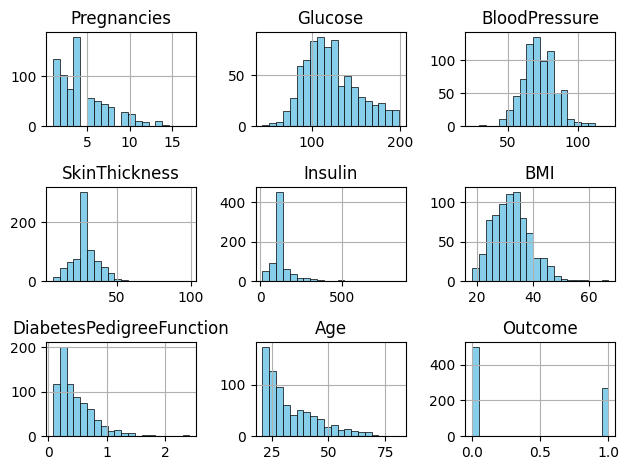

In [ ]:
# Histograms
plt.figure(figsize=(12, 8))
dataset.hist(bins=20, color='skyblue', edgecolor='black', linewidth=0.5)
plt.tight_layout()
plt.show()

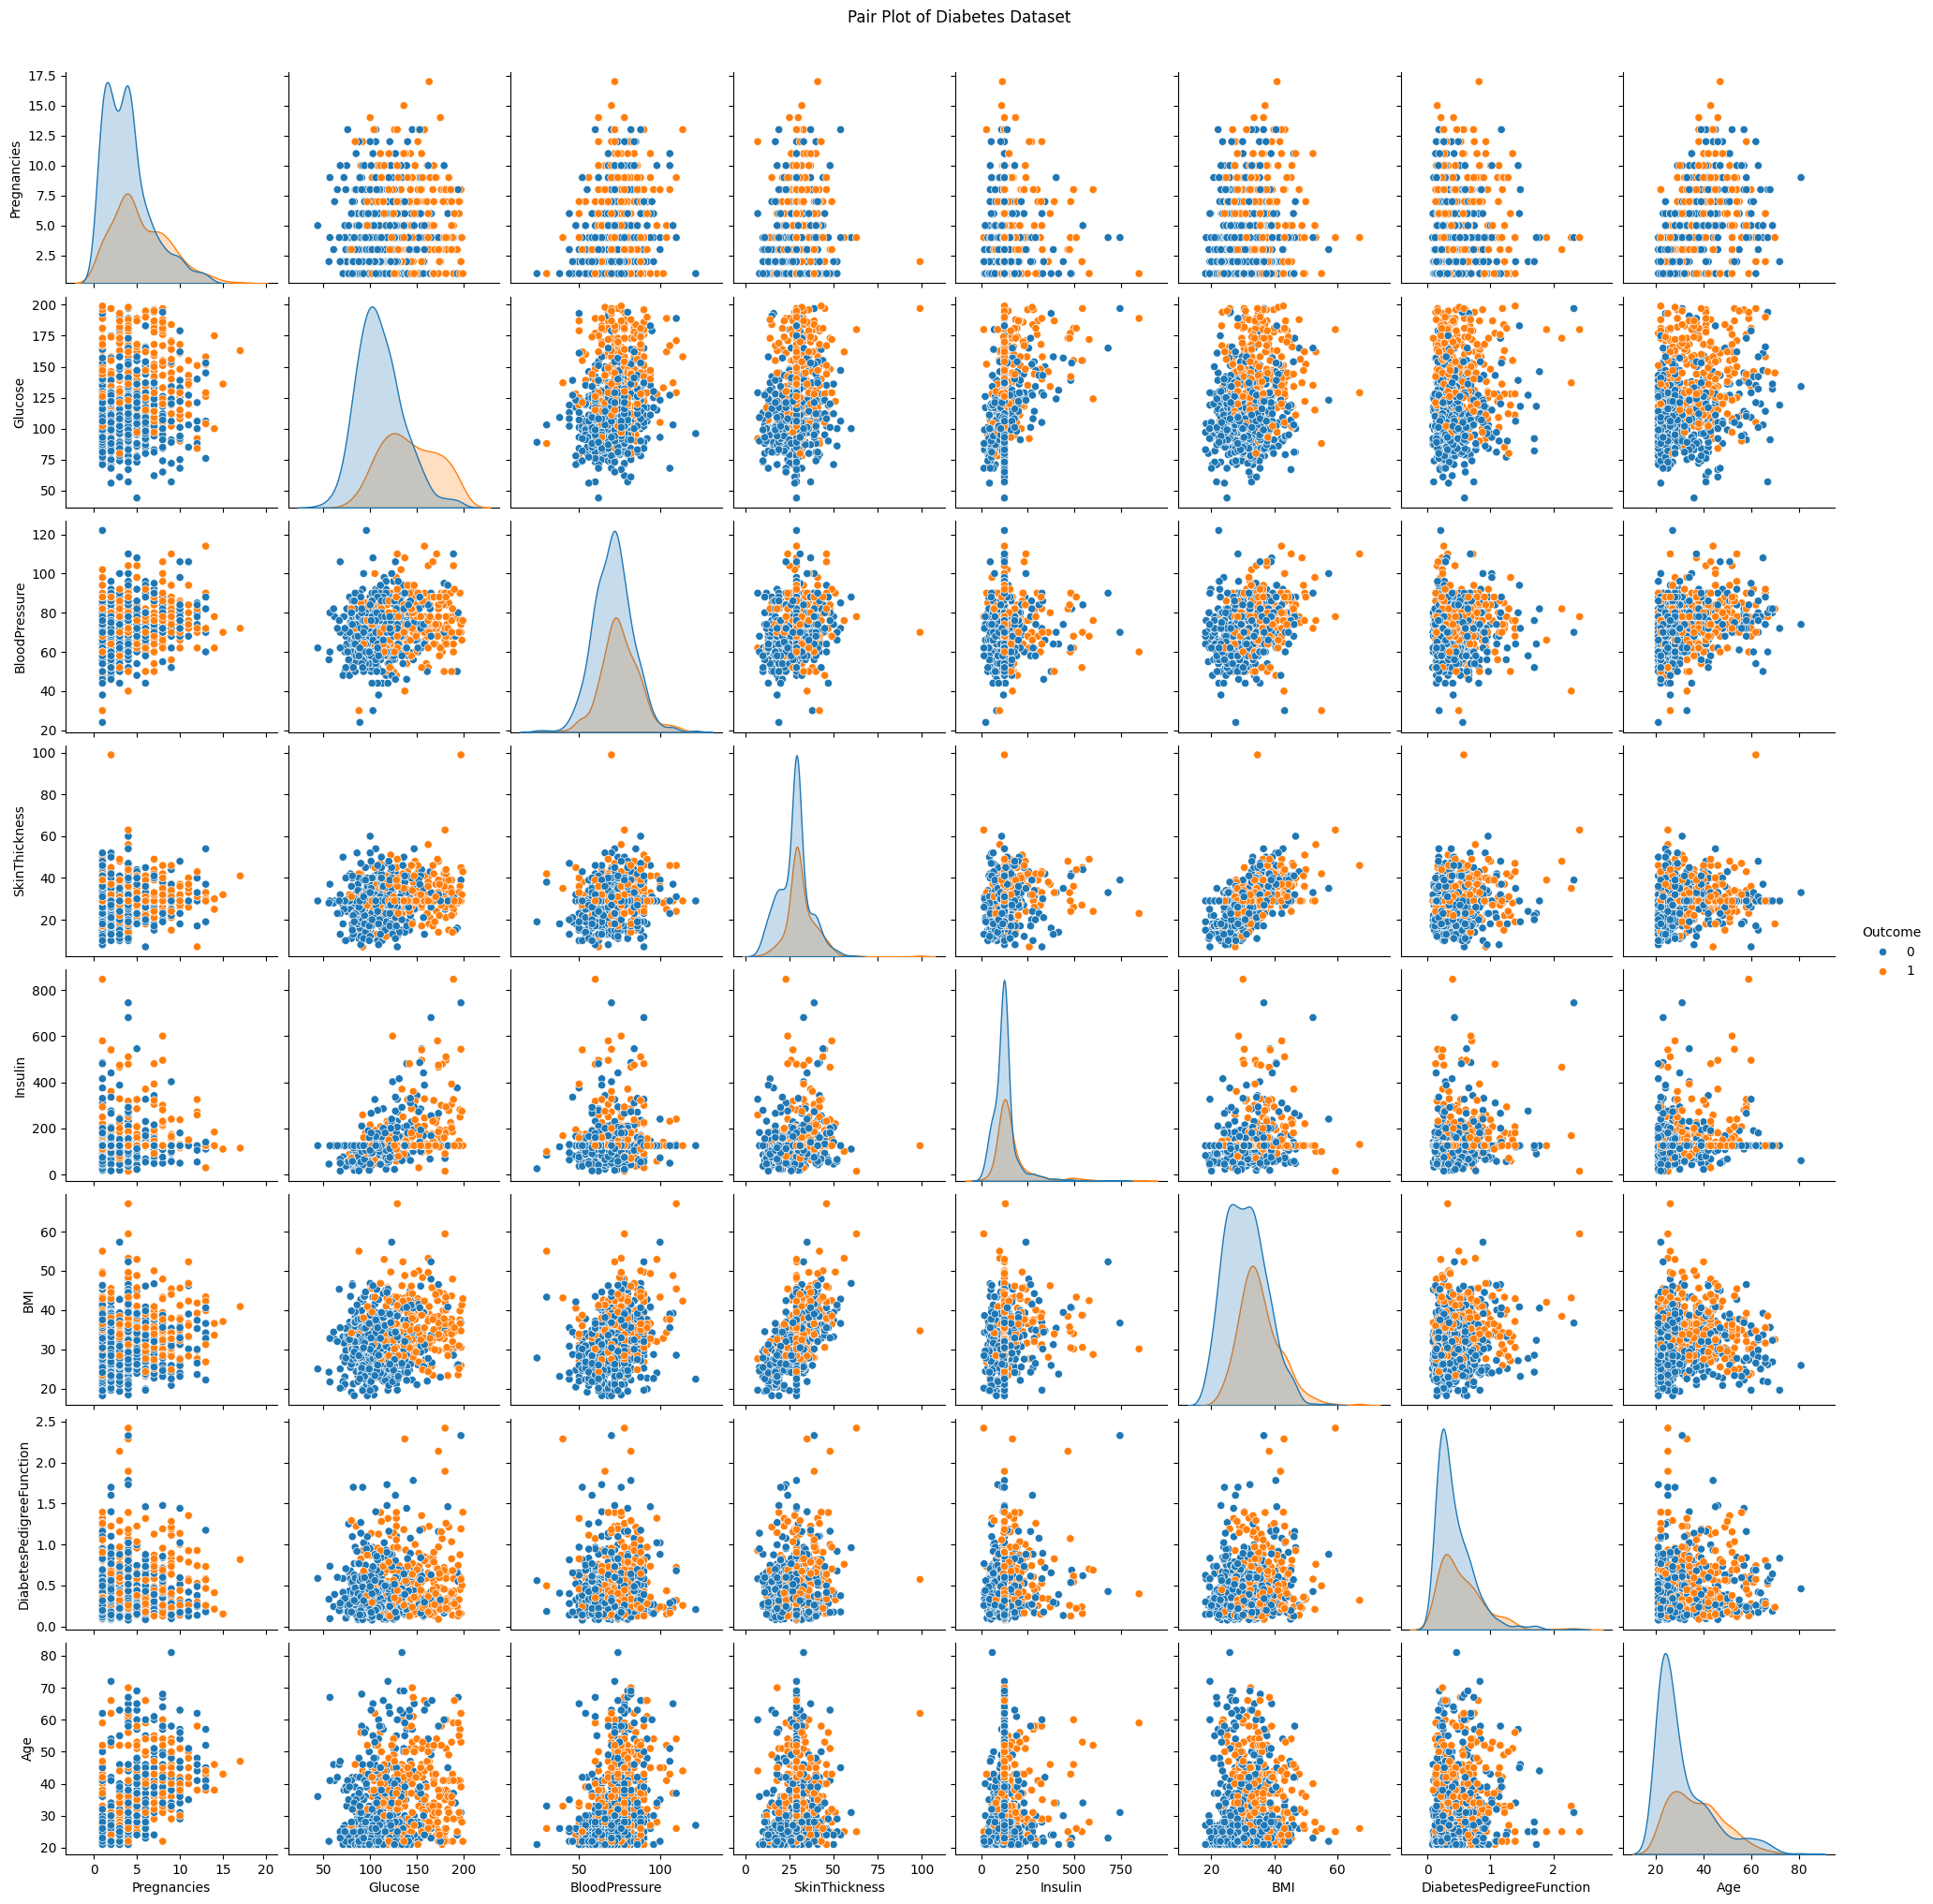

In [ ]:
# Scatter plot
data = sns.pairplot(dataset, hue='Outcome', diag_kind='kde')
data.fig.suptitle('Pair Plot of Diabetes Dataset', y=1.02)
plt.show()

# **4. Linear Regression Model**

# **Theory Recap:**

**Linear Regression** - a statistical method used in the field of data analysis and predictive modeling. It's particularly useful in understanding and modeling relationships between a dependent variable (target) and one or more independent variables (features or predictors).

**Assumptions of Multiple Linear Regression** - These assumptions are similar to simple linear regression, but they also include the assumption of no or low multicollinearity among the independent variables.

**Dependent Variable** - The dependent variable, also known as the "response variable" or "outcome variable," is the variable that you are trying to understand, predict, or explain in a statistical analysis or experiment.

**Independent Varible** - Also known as the "explanatory variable" or "predictor variable," is the variable that you manipulate or examine to see how it affects the dependent variable.

# **Implementation:**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Xline, Yline, test_size=0.2, random_state=42)
Model = LinearRegression()
Model.fit(X_train, Y_train)

LinearRegression()

# **Evaluation:**

In [ ]:
y_pred_test = Model.predict(X_test)
r_squared_test = r2_score(Y_test, y_pred_test)
mse_test = mean_squared_error(Y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print("Test Set Evaluation:")
print("R-squared:", r_squared_test)
print("Mean Squared Error:", mse_test)
print("Root Mean Squared Error:", rmse_test)

new_data = np.array([[6, 199, 120, 32, 127, 36, 0.26, 41]])
y_pred_new = Model.predict(new_data)
print(f"Predicted Disease Progression: {y_pred_new[0]}")

Test Set Evaluation:
R-squared: 0.28233857637850146
Mean Squared Error: 0.16476920440289503
Root Mean Squared Error: 0.4059177310772406
Predicted Disease Progression: 0.857362435741909


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **5. Logistic Regression Model**

# **Theory Recap:**

"**Logistic Regression** is a statistical technique used for predicting the outcome of a categorical dependent variable based on one or more predictor variables. It models the probability of a binary event occurring, such as success/failure, yes/no, or pass/fail scenarios."

**Logistic Function (Sigmoid Function):** The logistic function, also known as the sigmoid function, maps any real-valued number to a value between 0 and 1.

"**Logistic Regression is based on the concept of odds and log-odds.** The odds of an event is the ratio of the probability of the event to its complement. The logistic model uses these odds, transformed via the logarithm, to predict the probability of the target class."

**Model Evaluation Metrics** - "Evaluating the performance of a Logistic Regression model involves metrics such as Accuracy, Precision, Recall, and the F1 Score. The ROC Curve and AUC provide insights into the model's ability to distinguish between classes.


# **Implementation:**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Xlog, ylog, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

# **• Evaluation:**

Accuracy: 0.7792207792207793
confusion matrix: 
[[85 14]
 [20 35]]
classification report: 
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        99
           1       0.71      0.64      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154



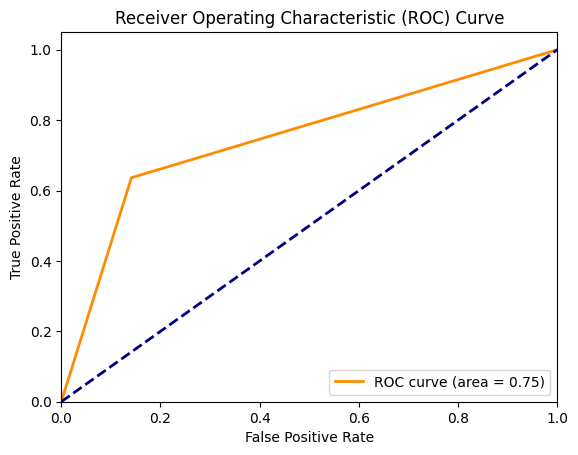

In [ ]:
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("confusion matrix: ")
print(conf_matrix)
print("classification report: ")
print(class_report)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **6. Model Comparison and Selection**

**Linear Regression:**

**Performance Metrics:**

* R-squared: 0.2823
* Mean Squared Error (MSE): 0.1648
* Root Mean Squared Error (RMSE): 0.4059
* Predicted Disease Progression: 0.8786

*   R-squared indicates that approximately 28.23% of the variance in the dependent variable is explained by the independent variables.

*   MSE and RMSE provide measures of the model's predictive accuracy, with lower values indicating better performance.

*   Predicted disease progression value is a specific prediction outcome.


*   Linear regression is suitable for predicting continuous outcomes. In this case, it seems to predict disease progression on a scale from 0 to 1.

**Logistic Regression:**

**Performance Metrics:**

* Accuracy: The overall accuracy of the model is approximately 0.779, which means that around 77.9% of the predictions made by the model are correct.

**Confusion Matrix:**

* True Negative (TN): 85

* False Positive (FP): 14

* False Negative (FN): 20

* True Positive (TP): 35

**(0)Non-Diabetic, (1)Diabetic**

The confusion matrix provides a detailed breakdown of correct and incorrect predictions made by the model. For example, it correctly classified 85 instances as negative (0) and 35 instances as positive (1), but it misclassified 14 instances as positive that were actually negative, and 20 instances as negative that were actually positive.

**Classification Report:**

* Precision: Precision measures the proportion of true positive predictions among all positive predictions. Precision for class 0 (non-diabetic) is 0.81, and for class 1 (diabetic) is 0.71.
* Recall: Recall measures the proportion of true positive predictions among all actual positive instances. Recall for class 0 is 0.86, and for class 1 is 0.64.
* F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The weighted average F1-score is approximately 0.78.
* Support: The number of actual occurrences of each class in the test dataset.



**Choosing between the two model depends on what purpose are you looking for.** If you are looking for continous outcome, linear regression is the best model for you. This model is created to predict disease progression base on other variables. While, if you are looking for two binary classification, Logistic regression is the model for you. This model is design to predict (0) as Non-diabetic, (1) as Diabetic.

**Linear Regression:**

R-squared: 0.2823

Mean Squared Error (MSE): 0.1648

Root Mean Squared Error (RMSE): 0.4059

**Logistic Regression:**

Accuracy: 0.7792

While both models have similar levels of performance, the logistic regression model has a higher accuracy (0.7792) compared to the R-squared value of the linear regression model (0.2823).



# **7. Conclusion and Insights**

**Key Findings:**

* Linear regression was used to predict disease progression, with an R-squared value of 0.2823 and other associated metrics such as Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).
* Logistic regression was employed for binary classification, achieving an accuracy of 0.7792 and supported by metrics like precision, recall, and F1-score.

* These statistical and machine learning methods enabled quantitative analysis and prediction based on data rather than subjective judgment.
* By providing metrics like R-squared, MSE, accuracy, precision, and recall, the models offered insights into the performance and predictive power of the algorithms.

**Potential Applications:**
* Potential application for these models can be used to medical fields to predict diseses based on some variables.

Both linear and logistic regression need their assumptions checked to make sure the models work well. linear regression assumes a linear relationship between variables, while logistic regression assumes linearity in the log-odds of the outcome variable. Remember, no model is flawless, and there's always some uncertainty in predictions.

# **8. References**


* Dataset - the National Institute of Diabetes and Digestive and Kidney Diseases Link: https://www.kaggle.com/datasets/shantanudhakadd/diabetes-dataset-for-beginners
* Linear theory recap - L4-Linear-Regression
* Logistic Theory recap - L5-Logistic-Regression
* Pandas - Data manipulation and analysis
* Numpy - Numerical Operation
* Matplotlib - Data Visualization
* seaborn - Data Visualization
* sklearn - Machine learning library
